### Loading the MNIST dataset in Keras

The Keras deep learning library provides a convenience method for loading the MNIST dataset. 

The dataset is downloaded automatically the first time this function is called.

This is very handy for developing and testing deep learning models.

Using TensorFlow backend.


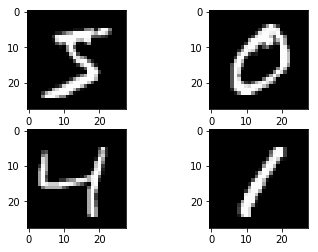

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### Baseline Model with Multi-Layer Perceptrons

We can get very good results using a very simple neural network model with a single hidden layer. We will create a simple multi-layer perceptron model that achieves an error rate of 1.74%.

In [13]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
%matplotlib inline

In [14]:
# fix random seed for reproducibility to ensure results are reproducible
seed = 26
numpy.random.seed(seed)

The training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

We can do this transform easily using the reshape() function on the NumPy array.

In [15]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

The pixel values are gray scale between 0 and 255. So we normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [16]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. So we use one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.

In [17]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Lets plot 10th label.

([<matplotlib.axis.XTick at 0x12b80efa2e8>,
 <a list of 10 Text xticklabel objects>)

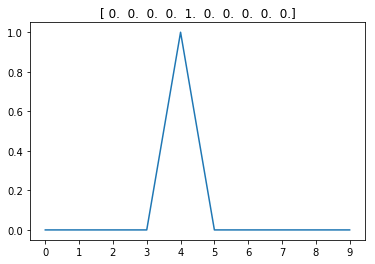

In [18]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10))

We are now ready to create our simple neural network model. We will define our model in a function.

In [19]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
     #Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Compile network
Before making network ready for training we added below things:

1. A loss function: to measure how good the network is

2. An optimizer: to update network as it sees more data and reduce loss value

3. Metrics: to monitor performance of network

We can now fit and evaluate the model. The model is fit over 10 epochs with updates every 100 images. The test data is used allowing us to see the skill of the model as it trains. A verbose value of 2 is used to reduce the output to one line for each training epoch.

Finally, the test dataset is used to evaluate the model and a classification error rate is printed

In [20]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
17s - loss: 0.2320 - acc: 0.9336 - val_loss: 0.1114 - val_acc: 0.9656
Epoch 2/10
17s - loss: 0.0891 - acc: 0.9736 - val_loss: 0.0758 - val_acc: 0.9761
Epoch 3/10
17s - loss: 0.0567 - acc: 0.9833 - val_loss: 0.0684 - val_acc: 0.9772
Epoch 4/10
17s - loss: 0.0385 - acc: 0.9887 - val_loss: 0.0740 - val_acc: 0.9756
Epoch 5/10
17s - loss: 0.0270 - acc: 0.9921 - val_loss: 0.0670 - val_acc: 0.9795
Epoch 6/10
17s - loss: 0.0193 - acc: 0.9945 - val_loss: 0.0594 - val_acc: 0.9836
Epoch 7/10
17s - loss: 0.0135 - acc: 0.9965 - val_loss: 0.0589 - val_acc: 0.9818
Epoch 8/10
17s - loss: 0.0104 - acc: 0.9974 - val_loss: 0.0614 - val_acc: 0.9827
Epoch 9/10
17s - loss: 0.0098 - acc: 0.9970 - val_loss: 0.0627 - val_acc: 0.9823
Epoch 10/10
16s - loss: 0.0099 - acc: 0.9971 - val_loss: 0.0640 - val_acc: 0.9821
Baseline Error: 1.79%


### Description of Model

The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). A rectifier activation function is used for the neurons in the hidden layer.

A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction. Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) and the efficient ADAM gradient descent algorithm is used to learn the weights.

This very simple network defined in very few lines of code achieves a respectable error rate of 1.91%.

# Convolutional Neural Network for MNIST 

Now we develop a CNN model.

Keras does provide a lot of capability for creating convolutional neural networks.

We will create a CNN for MNIST that use all of the aspects of a modern CNN implementation, including Convolutional layers, Pooling layers and Dropout layers.

In [2]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')




### Fix random seed for reproducibility



In [3]:
seed = 58
numpy.random.seed(seed)

Next we need to load the MNIST dataset and reshape it so that it is suitable for training a CNN. 

In the case of RGB, the first dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

In [4]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Description of model

The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, with the size of 5×5 and a rectifier activation function.

Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.

The next layer is a regularization layer called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.

Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.

Next a fully connected layer with 128 neurons and rectifier activation function.

Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.
 
The model is trained using logarithmic loss and the ADAM gradient descent algorithm.

In [6]:
def baseline_model():
  # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

We evaluate the model the same way as before with the multi-layer perceptron. The CNN is fit over 5 epochs with a batch size of 100


In [12]:
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=100, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
230s - loss: 0.1906 - acc: 0.9450 - val_loss: 0.0652 - val_acc: 0.9777
Epoch 2/5
229s - loss: 0.0632 - acc: 0.9809 - val_loss: 0.0459 - val_acc: 0.9854
Epoch 3/5
229s - loss: 0.0451 - acc: 0.9862 - val_loss: 0.0335 - val_acc: 0.9886
Epoch 4/5
230s - loss: 0.0332 - acc: 0.9896 - val_loss: 0.0336 - val_acc: 0.9888
Epoch 5/5
227s - loss: 0.0258 - acc: 0.9919 - val_loss: 0.0450 - val_acc: 0.9852
CNN Error: 1.48%


# Larger Convolutional Neural Network for MNIST

We import classes and function then load and prepare the data the same as in the previous CNN example.

In [9]:
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Description of Model

This time we define a large CNN architecture with additional convolutional, max pooling layers and fully connected layers.

Convolutional layer with 30 feature maps of size 5×5.

Pooling layer taking the max over 2*2 patches.

Convolutional layer with 15 feature maps of size 3×3.

Pooling layer taking the max over 2*2 patches.

Dropout layer with a probability of 20%.

Flatten layer.

Fully connected layer with 128 neurons and rectifier activation.

Fully connected layer with 50 neurons and rectifier activation.

Output layer.

In [10]:
def larger_model():
   # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate
(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 272s - loss: 0.3922 - acc: 0.8796 - val_loss: 0.1009 - val_acc: 0.9665
Epoch 2/10
60000/60000 [==============================] - 1070s - loss: 0.0953 - acc: 0.9709 - val_loss: 0.0564 - val_acc: 0.9815
Epoch 3/10
60000/60000 [==============================] - 234s - loss: 0.0694 - acc: 0.9790 - val_loss: 0.0385 - val_acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 225s - loss: 0.0565 - acc: 0.9825 - val_loss: 0.0317 - val_acc: 0.9887
Epoch 5/10
60000/60000 [==============================] - 225s - loss: 0.0478 - acc: 0.9850 - val_loss: 0.0303 - val_acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 223s - loss: 0.0430 - acc: 0.9864 - val_loss: 0.0278 - val_acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 222s - loss: 0.0383 - acc: 0.9878 - val_loss: 0.0271 - val_acc: 0.9908
Epoch 8/10
60000/60000 [======================

Running the example prints accuracy on the training and validation datasets each epoch and a final classification error rate.

This slightly larger model achieves the respectable classification error rate of 0.72%.